这是两款键盘布局不一样的手机(A版本，B版本)，你作为公司的产品经理，想在正式发布产品之前知道，哪个键盘布局对用户体验更好呢？

首先，我们需要设置目标，用来衡量各个版本的优劣，如果是电商网站，目标可以是点击率，注册率，页面停留时间等。

在这个键盘布局案例里，如果一个键盘布局对用户打字时拼错产生的影响较小，那么这个布局是符合用户体验习惯的。所以我们将目标定为用户打字时拼错字产生的影响。

有了目标以后，下一步就是采集数据。在这一部分，用户会随机分配到不同版本中，通过他们的交互行为会被直接检测，并收集起来作为以后分析的重要数据。

我们随机抽取实验者，将实验者分成2组，每组25人，A组使用键盘布局A，B组使用键盘布局B。让他们在30秒内打出标准的20个单词文字消息，然后记录打错字的数量。

我们将数据记录在Excel中，A列是使用键盘布局A打错字的数量，B列是使用键盘布局B打错字的数量。

现在我们开始A/B测试

# 一、描述统计分析

我们开展调查研究并计算统计结果时，我们会在报告的第一部分进行描述统计分析，例如平均值和标准差。描述统计量是研究的核心。告诉我们研究中发生的情况，应该始终报告出来。

In [1]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

需要安装一个读取excel文件的依赖包：xlrd，安装步骤如下：

1）先在conda中进入当前notebook文件所在的python环境，例如命令：

activate py3

2)在conda进入的python环境下安装该包：

conda install xlrd

如果上述安装失败报错，参考这个社群会员的解决方案：https://zhuanlan.zhihu.com/p/33959929

In [29]:
#文件路径
fileNameStr='./键盘AB测试.xlsx'

# 方法1
#读取Ecxcel数据，统一先按照字符串读入，之后转换
xls = pd.ExcelFile(fileNameStr, dtype='object')
data = xls.parse('Sheet1',dtype='object')
# 方法2
data = pd.read_excel(fileNameStr, sheet_name='Sheet1', dtype='object')

data.head()

,A,B
0,6,6
1,6,11
2,2,8
3,7,5
4,8,11


In [30]:
#查看每一列的数据类型
data.dtypes

A    object
B    object
dtype: object

In [41]:
#字符串转换为数值（浮点型）
data['A'] = data['A'].astype('int')
data['B'] = data['B'].astype('int')
print('转换后的数据类型：\n',data.dtypes)

转换后的数据类型：
 A    int64
B    int64
dtype: object


In [39]:
#描述统计信息
data.describe()

,A,B
count,25.000000,25.000000
mean,5.080000,7.800000
std,2.059935,2.645751
min,2.000000,3.000000
25%,4.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,10.000000
max,10.000000,13.000000


In [48]:
#样本平均值
a_mean=data['A'].mean()
b_mean=data['B'].mean()

print('A版本平均值=',a_mean,'单位：打错字数量')
print('B版本平均值=',b_mean,'单位：打错字数量')

'''
这里要区别：数据集的标准差，和样本标准差
数据集的标准差公式除以的是n，样本标准差公式除以的是n-1。
样本标准差，用途是用样本标准差估计出总体标准差
pandas计算的标准差，默认除以的是n-1，也就是计算出的是样本标准差
pandas标准差官网地址：https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html
'''
#样本标准差
a_std=data['A'].std()
b_std=data['B'].std()

print('A版本样本大小25，样本标准差=',a_std,'单位：打错字数量')
print('B版本样本大小25，样本标准差=',b_std,'单位：打错字数量')

A版本平均值= 5.08 单位：打错字数量
B版本平均值= 7.8 单位：打错字数量
A版本样本大小25，样本标准差= 2.05993527406405 单位：打错字数量
B版本样本大小25，样本标准差= 2.6457513110645907 单位：打错字数量


# 二、推论统计分析

推论统计分析报告中包括：假设检验，置信区间，效应量

## 1. 问题是什么？

### 零假设和备选假设

要研究的问题是：哪个键盘布局对用户体验更好呢？

根据这个问题我提出来下面两个互为相反的假设。

零假设：A版本和B版本没有差别，也就是A版本平均值=B版本平均值。

零假设总是表述为研究没有改变，没有效果，不起作用等，这里就是不满足标准。

备选假设：A版本和B版本有差别，也就是A版本平均值 不等于 B版本平均值。

### 检验类型

检验类型有很多种，因为这里有2组样本，是不同的人，所以选择双独立样本检验。

检验类型参考资料：http://support.minitab.com/zh-cn/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/

### 抽样分布类型

我们还要判断抽样分布是哪种？因为抽样分布的类型，决定了后面计算p值的不同。

在我们这个AB测试案例中，样本大小是25（小于30），属于小样本。那小样本的抽样分布是否满足t分布呢？因为t分布还要求总体分布近似正态分布，但是总体分布我们是不知道的，我们可以通过样本数据集的分布来推断总体分布。

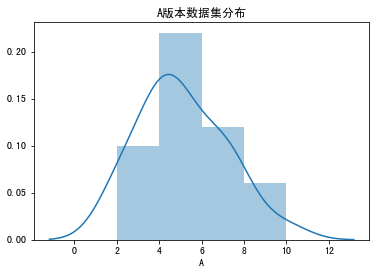

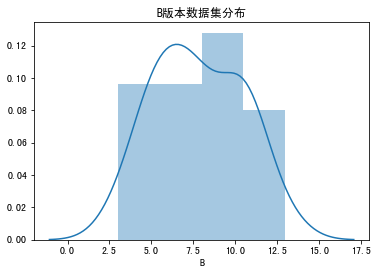

In [42]:
'''
直方图能够粗略估计数据密度，如果想给数据一个更精确的拟合曲线（专业术语叫：核密度估计kernel density estimate (KDE)），
Seaborn 可以很方便的画出直方图和拟合曲线。
查看数据集分布官网教程地址：https://seaborn.pydata.org/tutorial/distributions.html
'''
'''
需要在conda中先安装绘图包seaborn：
conda install seaborn
'''
import seaborn as sns

#查看数据集分布
sns.distplot(data['A'])
plt.title('A版本数据集分布')
plt.show()

sns.distplot(data['B'])
plt.title('B版本数据集分布')
plt.show()

通过观察上面数据集分布图，两个样本数据集都近似正态分布，满足t分布的使用条件，所以抽样分布是t分布

### 检验方向

单尾检验（左尾，右尾），还是双尾检验？

因为备选假设是A版本和B版本有差别，也就是A版本平均值 不等于 B版本平均值，所以我们使用双尾检验。

### 总结

综合以上分析，本次假设检验是双独立样本t检验，双尾检验。

# 2.证据是什么？

在零假设成立前提下，得到样本平均值的概率p是多少？

独立双样本t检验，计算标准误差和自由度的公式想要深入了解的可以看这里： https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test

In [44]:
'''
Scipy的双独立样本t检验不能返回自由度，对于后面计算置信区间不方便。所以我们使用另一个统计包（statsmodels）

需要在conda中当前notebook文件所在的python环境下安装统计包（statsmodels），安装命令：
conda install statsmodels

双独立（independent）样本t检验（ttest_ind）
statsmodels.stats.weightstats.ttest_ind
官网使用文档http://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html
'''
import statsmodels.stats.weightstats as st

'''
ttest_ind：独立双样本t检验，
usevar='unequal'两个总体方差不一样
返回的第1个值t是假设检验计算出的（t值），
第2个p_two是双尾检验的p值
第3个df是独立双样本的自由度
'''
t,p_two,df=st.ttest_ind(data['A'],data['B'],
                        usevar='unequal')

#自由度一般只保留整数部分
print('t=',t,'p_two=',p_two,',df=',df)

t= -4.0559385368573215 p_two= 0.00019457455307215953 ,df= 45.27813331135627


## 3. 判断标准是什么？

In [45]:
#判断标准（显著水平）使用alpha=5%
alpha=0.05

## 4. 做出结论

In [46]:
'''
双尾判断条件：p < 判断标准（显著水平）alpha 时，拒绝零假设，有统计显著，也就是有显著差异
'''
#做出结论
if(p_two< alpha): 
    print('拒绝零假设，有统计显著，也就是接受备选假设')
    print('备选假设：A版本和B版本有差异')
else: 
    print('接受零假设，没有统计显著')
    print('零假设：A版本和B版本没有差异')

拒绝零假设，有统计显著，也就是接受备选假设
备选假设：A版本和B版本有差异


独立双样本t(45)=-4.05 , p=.00019 (α=5%),双尾检验

统计上存在显著差异，拒绝零假设，从而验证A版本和B版本存在显著差异。

## 5.置信区间

图片里是APA格式的置信区间：平均值的置信区间，95% CI=(a,b)

在报告告置信区间时，提供了这样几个信息：
1）开头会说是哪种类型的置信区间
例如在单样本检验中是单个平均值的置信区间，但是在我们后面要讲到的相关样本检验是两个平均值之间差异的置信区间。
在这个案例里，我们是单个平均值的置信区间
2）置信水平和区间的上下限。
置信水平（简写为CI），括号里写上下限。这里是95的置信水平

In [49]:
'''
1）置信水平对应的t值（t_ci）
查t表格可以得到，95%的置信水平，自由度是n-1对应的t值
2）计算上下限,
置信区间上限a=样本平均值 - t_ci ×标准误差
置信区间下限b=样本平均值 - t_ci ×标准误差
'''

'''
95%的置信水平，自由度df对应的t值，可以查找t表格获取，
也可以通过这个工具获取：https://www.graphpad.com/quickcalcs/statratio1/（利用这个工具获取t值，需要注意输入的概率值是1-95%=0.05）
注意：课程中这里对应的下面t_ci值有误，以下面的值为准
'''
t_ci=2.0141

#样本大小n
a_n = 25
b_n = 25

'''
numpy.square 平方
numpy.sqrt开方
标准误差计算公式：
https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test
'''
se=np.sqrt( np.square(a_std)/a_n + np.square(b_std)/b_n )

'''
对于双独立样本检验
置信区间的样本平均值=A版本平均值 - B版本平均值
'''
sample_mean=a_mean - b_mean
#置信区间上限
a=sample_mean - t_ci * se
#置信区间下限
b=sample_mean + t_ci * se

In [50]:
print('两个平均值差值的置信区间，95置信水平 CI=[%f,%f]' % (a,b))

两个平均值差值的置信区间，95置信水平 CI=[-4.070699,-1.369301]


置信区间是[-4.07,-1.36],平均下来，使用A键盘的错误数量要比B键盘的要少大约4到1个

### 6.效应量

为什么要给出效应量？

在判断某个调查研究的结果，是否有意义或者重要时，要考虑的另一项指标是效应量。效应量太小，意味着处理即使达到了显著水平，也缺乏实用价值。

所以，在假设检验中，我们给出了是否具有统计显著性，也要给出效应量，一起来判断研究结果是否有意义。

效应量报告格式：d=x.xx ，R2=.xx

In [52]:
'''
效应量：差异指标Cohen's d
这里的标准差，因为是双独立样本，需要用合并标准差（pooled standard deviations）代替
'''
#合并标准差
sp=np.sqrt(((a_n-1)*np.square(a_std) + (b_n-1)* np.square(a_std) ) / (a_n+b_n-2))
#效应量Cohen's d
d=(a_mean - b_mean) / sp

print('d=',d)

d= -1.3204298378918027


# 三、数据分析报告

1、描述统计分析

A版本打错字数量
平均是5.08个，标准差是2.06个

B版本打错字数量
平均是7.8个，标准差是2.65个

2、推论统计分析
1）假设检验
独立双样本t(45)=-4.05 , 
p=.00019 (α=5%) , 双尾检验

拒绝零假设，统计显著。

2）置信区间
两个平均值差值的置信区间，
95%置信水平 CI=[-4.07,-1.36]


3）效应量
d= - 1.32，效果显著